<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


In [4]:
summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    '% Missing': (df.isnull().mean() * 100).round(2).values,
    'Unique Values': df.nunique().values,
    'Values' : [df[col].dropna().unique().tolist() for col in df.columns]
})

In [5]:
sel_cols = ['Employment', 'JobSat', 'RemoteWork']

summary_filtered = summary[summary['Column'].isin(sel_cols)] # filter 'Column' field
summary_filtered = summary_filtered.sort_values('% Missing', ascending=False).reset_index(drop=True) # sort values, reset index
summary_filtered

,Column,Data Type,Missing Values,% Missing,Unique Values,Values
0,JobSat,float64,36311,55.49,11,"[8.0, 5.0, 10.0, 6.0, 9.0, 4.0, 7.0, 3.0, 2.0,..."
1,RemoteWork,object,10631,16.25,3,"[Remote, In-person, Hybrid (some remote, some ..."
2,Employment,object,0,0.00,110,"[Employed, full-time, Student, full-time, Stud..."


In [6]:
# Impute RemoteWork (16% missing) using mode
print('Nulls before imputation:', df['RemoteWork'].isnull().sum())

mode_RemoteWork = df['RemoteWork'].mode().iloc[0]
df.fillna({'RemoteWork': mode_RemoteWork}, inplace=True)

print('Nulls after imputation:', df['RemoteWork'].isnull().sum())

Nulls before imputation: 10631
Nulls after imputation: 0


In [7]:
# Impute JobSat (55% missing!) using group-wise mode to preserve subgroup differences and reduce bias
print('Nulls before imputation:', df['JobSat'].isnull().sum())

df['JobSat'] = df.groupby(['RemoteWork', 'Employment'])['JobSat'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
df.fillna({'RemoteWork': df['JobSat'].mode().iloc[0]}, inplace=True) # in case a group has missing values

print('Nulls after imputation:', df['JobSat'].isnull().sum())

Nulls before imputation: 36311
Nulls after imputation: 8385


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [8]:
# Scan YearsCodePro values
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [9]:
# Replace strings with approximate numeric values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'  # or cap it to 50
})

# Convert to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Verify
df['YearsCodePro'].describe()

count    51610.000000
mean        10.184344
std          9.109703
min          0.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro, dtype: float64

In [10]:
# Missing values for YearsCodePro
print(df['YearsCodePro'].isnull().sum())

13827


In [11]:
# Impute YearsCodePro using mean
print('Nulls before imputation:', df['YearsCodePro'].isnull().sum())

mean_YearsCodePro = df['YearsCodePro'].mean()
df.fillna({'YearsCodePro': mean_YearsCodePro}, inplace=True)

print('Nulls after imputation:', df['YearsCodePro'].isnull().sum())

Nulls before imputation: 13827
Nulls after imputation: 0


In [12]:
# Create bins for experience
max_year = df['YearsCodePro'].max()
bins = [0, 5, 10, 20, max_year]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels,
                               include_lowest=True, # include 0
                               right=True) # include max
# Verify
df.groupby('ExperienceRange', observed=True)['YearsCodePro'].agg(['min', 'max'])

,min,max
ExperienceRange,,
0-5,0.000000,5.0
5-10,6.000000,10.0
10-20,10.184344,20.0
>20,21.000000,51.0


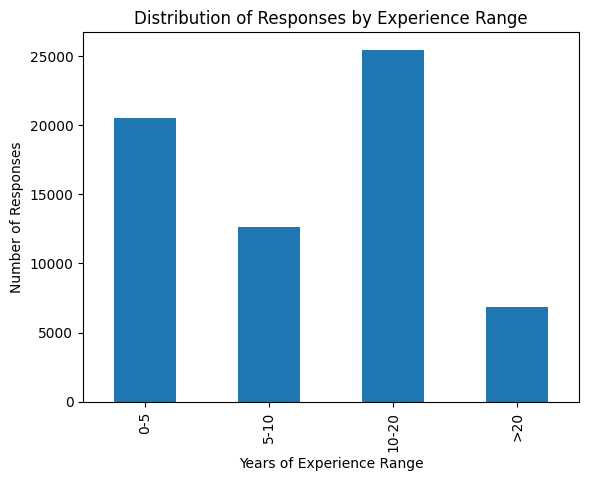

In [13]:
dist_ExperienceRange = df['ExperienceRange'].value_counts().sort_index()
dist_ExperienceRange.plot(kind='bar')
plt.title('Distribution of Responses by Experience Range')
plt.ylabel('Number of Responses')
plt.xlabel('Years of Experience Range')
plt.show()

In [14]:
# Check JobSat
df['JobSat'].describe()

count    57052.000000
mean         7.451851
std          1.657987
min          0.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [15]:
# Missing values for JobSat
print(df['JobSat'].isnull().sum())

8385


In [16]:
# Calculate the median `JobSat` for each 'YearsCodePro' range
medianJobSatByExperienceRange = df.groupby('ExperienceRange', observed=True)['JobSat'].median().reset_index()
medianJobSatByExperienceRange

,ExperienceRange,JobSat
0,0-5,8.0
1,5-10,8.0
2,10-20,8.0
3,>20,8.0


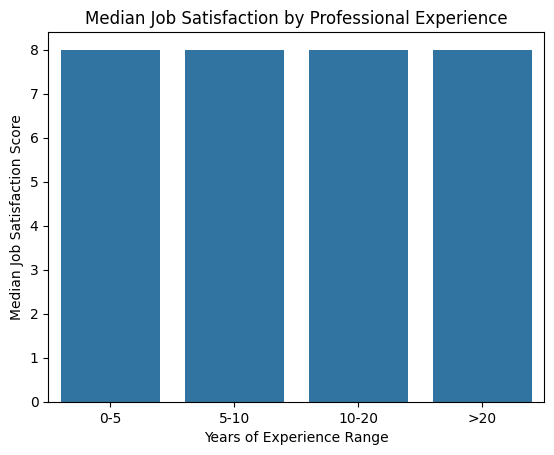

In [17]:
# Visualize
sns.barplot(data=medianJobSatByExperienceRange, x='ExperienceRange', y='JobSat')
plt.title('Median Job Satisfaction by Professional Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.xlabel('Years of Experience Range')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


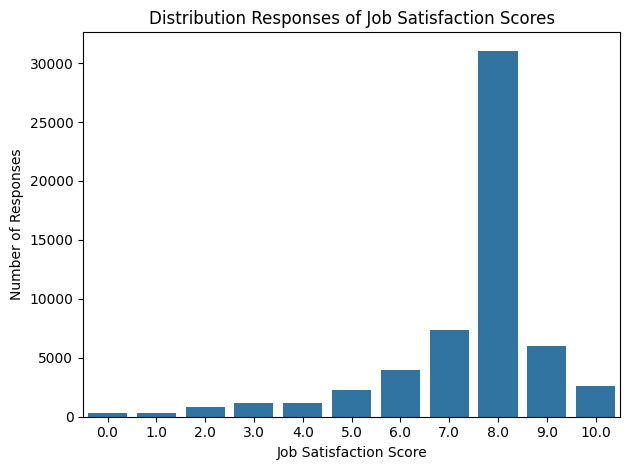

In [18]:
sns.countplot(data=df, x='JobSat')
plt.title('Distribution Responses of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [19]:
# Check RemoteWork
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

In [20]:
# Standardize RemoteWork values
df['RemoteWork'] = df['RemoteWork'].replace('Hybrid (some remote, some in-person)', 'Hybrid')

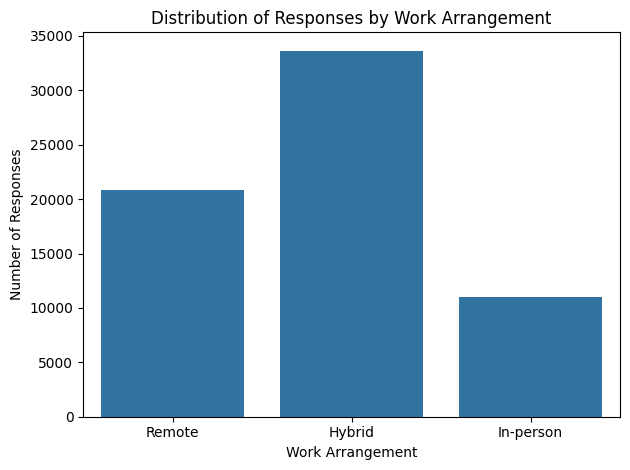

In [21]:
# Use a count plot to show remote work distribution
sns.countplot(data=df, x='RemoteWork')
plt.title('Distribution of Responses by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

In [22]:
# Scan Employment
print('Employment Type: ', df['Employment'].nunique())
print(df['Employment'].unique())

Employment Type:  110
['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but looking for 

In [23]:
# Standardize Employment column
employment_map = {
    'Employed, full-time': 'Employed',
    'Employed, part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student',
    'Not employed, but looking for work': 'Unemployed',
    'Not employed, and not looking for work': 'Unemployed',
    'Retired': 'Retired',
    'I prefer not to say': 'Prefer not to say'}

# Function to categorize employment
def summarize_employment(entry):
    if pd.isnull(entry):
        return 'Unknown'
    roles = [r.strip() for r in str(entry).split(';')]
    mapped = set(employment_map.get(role, 'Other') for role in roles)
    return 'Multiple' if len(mapped) > 1 else list(mapped)[0]

# Create new column in your main dataframe
df['EmploymentType'] = df['Employment'].apply(summarize_employment)

# Verify
df['EmploymentType'].value_counts()

EmploymentType
Employed             40519
Multiple             10733
Student               5254
Self-employed         4846
Unemployed            3014
Prefer not to say      546
Retired                525
Name: count, dtype: int64

In [24]:
# Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles
crosstab = pd.crosstab(df['EmploymentType'], df['RemoteWork'])
crosstab

RemoteWork,Hybrid,In-person,Remote
EmploymentType,,,
Employed,17957,8914,13648
Multiple,5047,1733,3953
Prefer not to say,546,0,0
Retired,525,0,0
Self-employed,1303,313,3230
Student,5254,0,0
Unemployed,3014,0,0


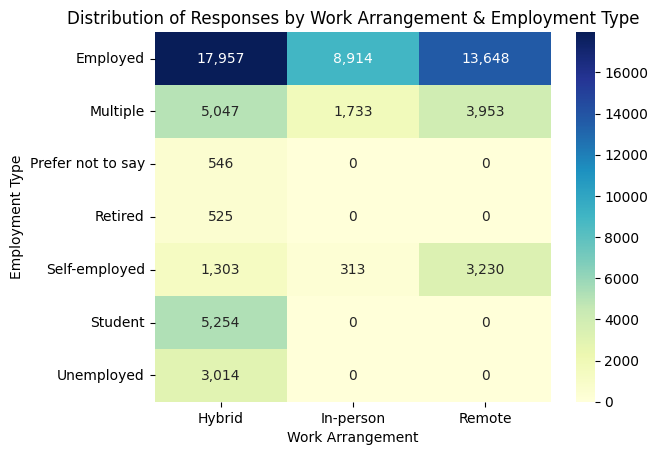

In [25]:
# Visualize cross tabulation
sns.heatmap(crosstab, annot=True, fmt=',.0f', cmap='YlGnBu')
plt.title('Distribution of Responses by Work Arrangement & Employment Type')
plt.xlabel('Work Arrangement')
plt.ylabel('Employment Type')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [26]:
# Scan Country
df['Country'].value_counts().head(10)

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64

In [27]:
# Filter data by country or region
countries = ['United States of America', 'Germany', 'India', 'Ukraine']
df_filtered = df[df['Country'].isin(countries)].reset_index()
df_filtered = df_filtered[['ResponseId', 'Country', 'LanguageHaveWorkedWith']]
df_filtered['Country'] = df_filtered['Country'].replace('United States of America', 'USA')
df_filtered.head()

,ResponseId,Country,LanguageHaveWorkedWith
0,1,USA,NaN
1,6,USA,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
2,7,USA,R
3,11,USA,JavaScript;Python;Ruby
4,13,USA,Bash/Shell (all shells);C#;JavaScript;PowerShe...


In [28]:
# Scan LanguageHaveWorkedWith
print('Languages:', df_filtered['LanguageHaveWorkedWith'].nunique())
print(df_filtered['LanguageHaveWorkedWith'].unique())

Languages: 10821
[nan
 'Bash/Shell (all shells);HTML/CSS;Java;JavaScript;Python;Rust;Swift;TypeScript'
 'R' ...
 'Bash/Shell (all shells);C;C#;C++;Go;HTML/CSS;Java;JavaScript;Lua;Python'
 'C;C#;C++;Go;HTML/CSS;JavaScript;Objective-C;Python;Swift;TypeScript'
 'C;C++;Go;Lua;Objective-C;Python;Rust;SQL']


In [29]:
# Drop rows with missing values in LanguageHaveWorkedWith
df_filtered = df_filtered[df_filtered['LanguageHaveWorkedWith'].notna()]
df_filtered.isnull().sum()

ResponseId                0
Country                   0
LanguageHaveWorkedWith    0
dtype: int64

In [30]:
# Split the languages into a list
df_filtered['LanguageHaveWorkedWith'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')

# Explode so each row is one language
df_filtered_exploded = df_filtered.explode('LanguageHaveWorkedWith')
df_filtered_exploded['LanguageHaveWorkedWith'] = df_filtered_exploded['LanguageHaveWorkedWith'].str.strip()

# Verify
df_filtered_exploded['LanguageHaveWorkedWith'].value_counts().head(20)

LanguageHaveWorkedWith
JavaScript                 13843
Python                     11967
HTML/CSS                   11788
SQL                        11264
TypeScript                  8426
Bash/Shell (all shells)     8084
Java                        6980
C#                          5554
C++                         5479
C                           4712
PHP                         3374
Go                          3218
PowerShell                  3159
Rust                        2950
Kotlin                      1990
Lua                         1425
Ruby                        1286
Assembly                    1182
Swift                       1182
Dart                        1164
Name: count, dtype: int64

In [31]:
df_filtered_exploded['LanguageHaveWorkedWith'].unique()

array(['Bash/Shell (all shells)', 'HTML/CSS', 'Java', 'JavaScript',
       'Python', 'Rust', 'Swift', 'TypeScript', 'R', 'Ruby', 'C#',
       'PowerShell', 'VBA', 'PHP', 'SQL', 'Visual Basic (.Net)', 'Lua',
       'Go', 'Scala', 'C++', 'MATLAB', 'Perl', 'C', 'Crystal', 'Julia',
       'Delphi', 'Fortran', 'Groovy', 'Kotlin', 'Elixir', 'Erlang',
       'MicroPython', 'Assembly', 'Dart', 'Clojure', 'Lisp', 'Prolog',
       'Haskell', 'OCaml', 'F#', 'Objective-C', 'Zig', 'Solidity',
       'GDScript', 'Apex', 'Ada', 'Zephyr', 'Nim', 'Cobol'], dtype=object)

In [32]:
# Visualize the top programming languages by region with a bar plot or heatmap
language = df_filtered_exploded.groupby('LanguageHaveWorkedWith')['ResponseId'].nunique().sort_values(ascending=True).tail(10)
language

LanguageHaveWorkedWith
C                           4712
C++                         5479
C#                          5554
Java                        6980
Bash/Shell (all shells)     8084
TypeScript                  8426
SQL                        11264
HTML/CSS                   11788
Python                     11967
JavaScript                 13843
Name: ResponseId, dtype: int64

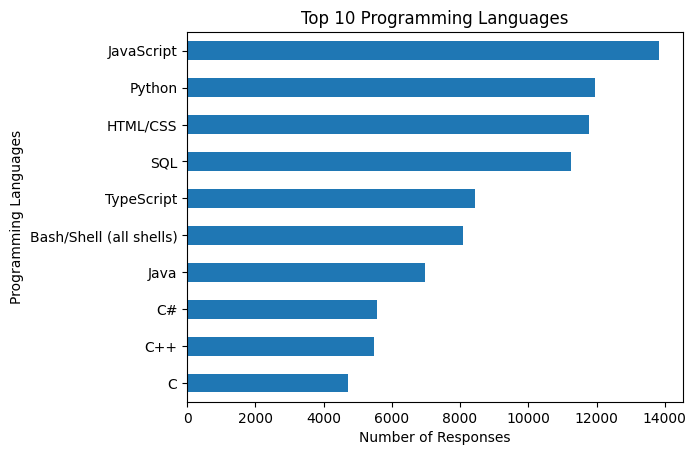

In [33]:
language.plot(kind='barh')
plt.xlabel('Number of Responses')
plt.ylabel('Programming Languages')
plt.title('Top 10 Programming Languages')
plt.show()

In [34]:
# Count and pivot distinct ResponseId per Country & Language
country_lang = df_filtered_exploded.groupby(['Country', 'LanguageHaveWorkedWith'])['ResponseId'].nunique().reset_index()
country_lang_pivot = country_lang.pivot(index='LanguageHaveWorkedWith', columns='Country', values='ResponseId').fillna(0)
country_lang_pivot.head()

Country,Germany,India,USA,Ukraine
LanguageHaveWorkedWith,,,,
Ada,26,32,83,27
Apex,25,27,128,27
Assembly,324,141,641,76
Bash/Shell (all shells),1970,759,4776,579
C,1147,1084,2225,256


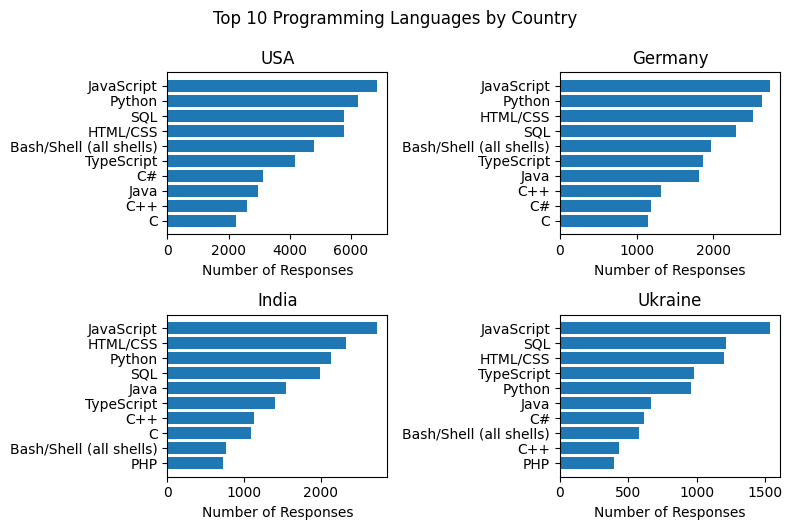

In [35]:
countries = ['USA', 'Germany', 'India', 'Ukraine']
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes = axes.flatten()  # Make it easier to loop over
for i, country in enumerate(countries):
    data = country_lang_pivot[country].sort_values(ascending=True).tail(10)
    axes[i].barh(data.index, data.values)
    axes[i].set_title(country)
    axes[i].set_xlabel('Number of Responses')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle('Top 10 Programming Languages by Country', y=1.05)
plt.show()

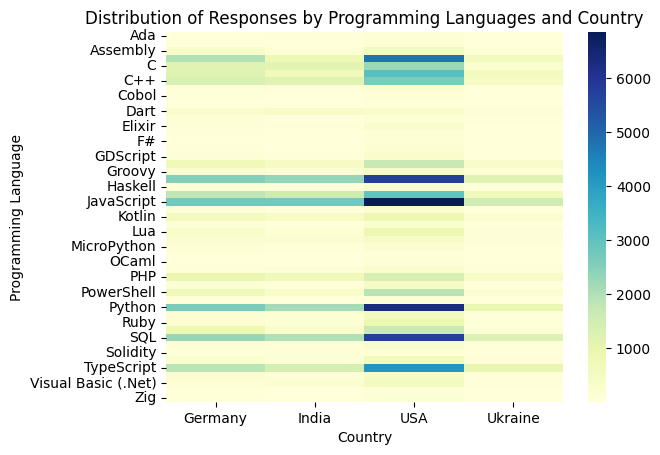

In [36]:
sns.heatmap(country_lang_pivot, cmap='YlGnBu')
plt.title('Distribution of Responses by Programming Languages and Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


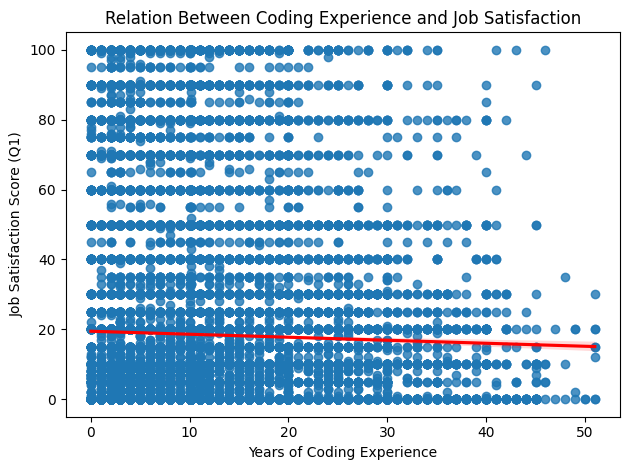

In [37]:
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].dropna() # remove nulls

sns.regplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', line_kws={'color': 'red'})
plt.title('Relation Between Coding Experience and Job Satisfaction')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Job Satisfaction Score (Q1)')
plt.tight_layout()
plt.show()

In [38]:
from scipy.stats import pearsonr

# Pearson Correlation
def perform_pearson_correlation(x, y):
    pearson_coef, p_value = pearsonr(x, y)
    # Interpret strength
    if pearson_coef >= 0.7:
        label = "high positive correlation"
    elif pearson_coef >= 0.3:
        label = "moderate positive correlation"
    elif pearson_coef > 0:
        label = "weak positive correlation"
    elif pearson_coef <= -0.7:
        label = "high negative correlation"
    elif pearson_coef <= -0.3:
        label = "moderate negative correlation"
    elif pearson_coef < 0:
        label = "weak negative correlation"
    else:
        label = "no correlation"
    # Interpret significance
    significance = "statistically significant" if p_value < 0.05 else "not statistically significant"
    #Print results
    print(f"Pearson correlation: {pearson_coef} ({label})")
    print(f"P-value: {p_value} ({significance})")

# Call the function
perform_pearson_correlation(df_corr['YearsCodePro'], df_corr['JobSatPoints_1'])

Pearson correlation: -0.027755883648848786 (weak negative correlation)
P-value: 1.9972678749242384e-06 (statistically significant)


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [39]:
# Scan EdLevel
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [40]:
# Standardize education Level
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate/Prof. Degree',
    'Something else': 'Other'
}

df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

In [41]:
# Check standardized data
print(df['EdLevel'].unique())
print(df['EmploymentType'].unique())

['Primary School' 'Bachelor’s Degree' 'Master’s Degree' 'Some College'
 'High School' 'Doctorate/Prof. Degree' 'Associate Degree' 'Other' nan]
['Employed' 'Student' 'Multiple' 'Self-employed' 'Unemployed'
 'Prefer not to say' 'Retired']


In [42]:
# Cross-tabulation
df_corr1 = df[['EdLevel', 'EmploymentType']].dropna()
crosstab1 = pd.crosstab(df_corr1['EdLevel'], df_corr1['EmploymentType'])
crosstab1

EmploymentType,Employed,Multiple,Prefer not to say,Retired,Self-employed,Student,Unemployed
EdLevel,,,,,,,
Associate Degree,1107,336,9,18,143,95,85
Bachelor’s Degree,17295,3631,96,158,1592,1033,1137
Doctorate/Prof. Degree,2164,320,29,96,239,42,80
High School,1581,1513,92,18,367,1868,354
Master’s Degree,11394,1923,53,117,1341,267,462
Other,405,157,83,11,67,129,80
Primary School,187,242,51,6,57,470,133
Some College,3735,1839,51,77,728,811,410


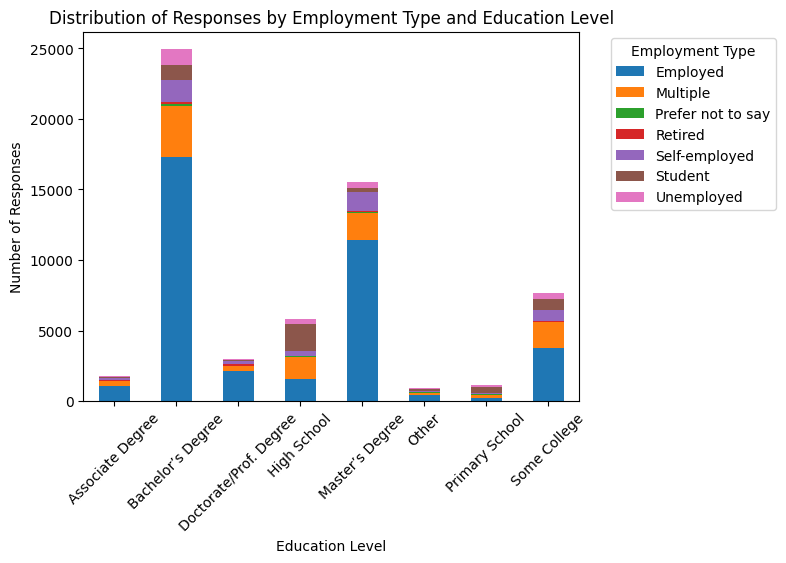

In [43]:
crosstab1.plot(kind='bar', stacked=True)
plt.title('Distribution of Responses by Employment Type and Education Level')
plt.ylabel('Number of Responses')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [44]:
# Cross-tabulation (normalized)
crosstab1_normalized = pd.crosstab(df_corr1['EdLevel'], df_corr1['EmploymentType'], normalize='all') # all, column, index
crosstab1_normalized

EmploymentType,Employed,Multiple,Prefer not to say,Retired,Self-employed,Student,Unemployed
EdLevel,,,,,,,
Associate Degree,0.018212,0.005528,0.000148,0.000296,0.002353,0.001563,0.001398
Bachelor’s Degree,0.284532,0.059736,0.001579,0.002599,0.026191,0.016995,0.018706
Doctorate/Prof. Degree,0.035601,0.005265,0.000477,0.001579,0.003932,0.000691,0.001316
High School,0.026010,0.024891,0.001514,0.000296,0.006038,0.030732,0.005824
Master’s Degree,0.187451,0.031637,0.000872,0.001925,0.022062,0.004393,0.007601
Other,0.006663,0.002583,0.001365,0.000181,0.001102,0.002122,0.001316
Primary School,0.003076,0.003981,0.000839,0.000099,0.000938,0.007732,0.002188
Some College,0.061447,0.030255,0.000839,0.001267,0.011977,0.013342,0.006745


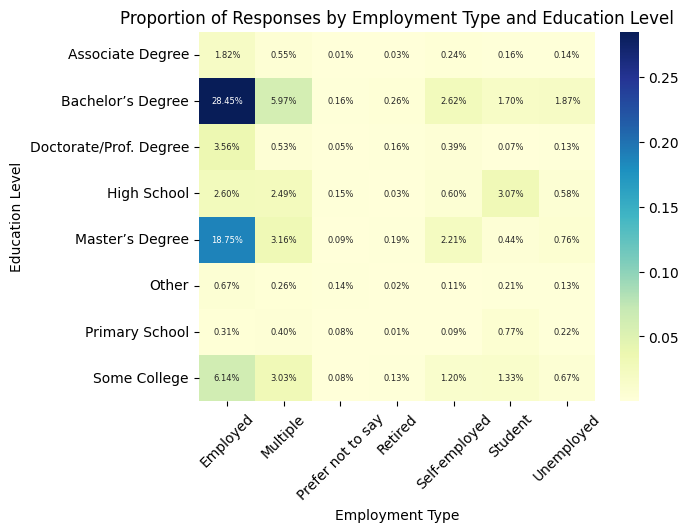

In [45]:
sns.heatmap(crosstab1_normalized, annot=True, fmt=".2%", annot_kws={"size":6}, cmap='YlGnBu')
plt.title('Proportion of Responses by Employment Type and Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.show()

In [46]:
from scipy.stats import chi2_contingency

# Chi-Square Test of Independence
def perform_chi_square(x):
    chi2, p_value, dof, expected = chi2_contingency(x)
    significance = "statistically significant" if p_value < 0.05 else "not statistically significant"
    # Print result
    print("Chi-square test statistic:", chi2)
    print("Degrees of freedom:", dof)
    print(f"P-value: {p_value} ({significance})")

# Call the function
perform_chi_square(crosstab1)

Chi-square test statistic: 12645.510254848805
Degrees of freedom: 42
P-value: 0.0 (statistically significant)


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [47]:
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
